    Load and convert the date columns to datetime format

In [4]:
import pandas as pd 

# DATA PATH
course_info_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_course_info.csv'
course_ratings_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_course_ratings.csv'

exam_info_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_exam_info.csv'
quiz_info_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_quiz_info.csv'

student_engagement_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_engagement.csv'
student_exams_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_exams.csv'
student_hub_questions_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_hub_questions.csv'
student_info_csv= '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_info.csv'
student_learning_csv = '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_learning.csv'
student_purchases_csv =  '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_purchases.csv'
student_quizzes_csv= '/home/anish/plan/365-Data-Challenge/data/365_database/365_student_quizzes.csv'

# CONVERTING DATA TO PANDAS DATAFRAME
course_info = pd.read_csv(course_info_csv) # number of courses offered
course_ratings = pd.read_csv(course_ratings_csv) # every rating of courses (filter through course id)
course_ratings['date_rated'] = pd.to_datetime(course_ratings['date_rated'])

exam_info = pd.read_csv(exam_info_csv)
 
quiz_info = pd.read_csv(quiz_info_csv)

student_engagement = pd.read_csv(student_engagement_csv)
student_engagement['date_engaged'] = pd.to_datetime(student_engagement['date_engaged'])

student_exams = pd.read_csv(student_exams_csv)
student_exams['date_exam_completed'] = pd.to_datetime(student_exams['date_exam_completed'])

student_hub_questions = pd.read_csv(student_hub_questions_csv)
student_hub_questions['date_question_asked'] = pd.to_datetime(student_hub_questions['date_question_asked'])

student_info = pd.read_csv(student_info_csv)
student_info['date_registered'] = pd.to_datetime(student_info['date_registered'])

student_learning = pd.read_csv(student_learning_csv)
student_learning['date_watched'] = pd.to_datetime(student_learning['date_watched'])

student_purchases= pd.read_csv(student_purchases_csv)
student_purchases['date_purchased'] = pd.to_datetime(student_purchases['date_purchased'])

student_quizzes = pd.read_csv(student_quizzes_csv)

    Which are the countries with the most students registered?

<AxesSubplot: xlabel='country', ylabel='count'>

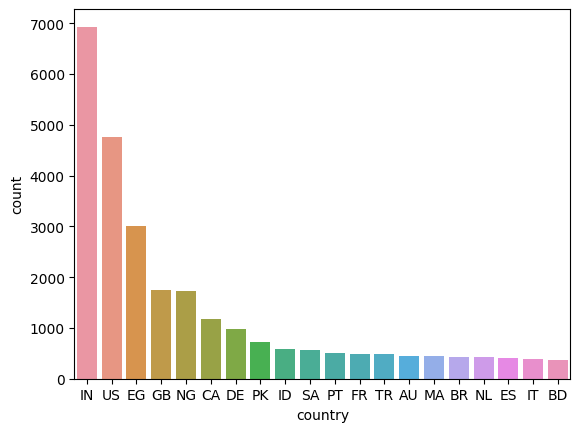

In [5]:
import seaborn as sns
countries=student_info.student_country.unique()
student_per_country=[]

for cn in countries:
    count = student_info[student_info['student_country'] == cn].count()
    student_per_country.append([cn,count.student_id])

student_per_country_df = pd.DataFrame(student_per_country,columns=['country','count'])
student_per_country_df= student_per_country_df.sort_values(by='count',ascending=False)
sns.barplot(x=student_per_country_df[student_per_country_df['count']>=350]['country'], y= student_per_country_df[student_per_country_df['count']>=350]['count'])

    Does this number scale proportionally with the number of minutes watched per country?

<AxesSubplot: xlabel='country', ylabel='watch_time'>

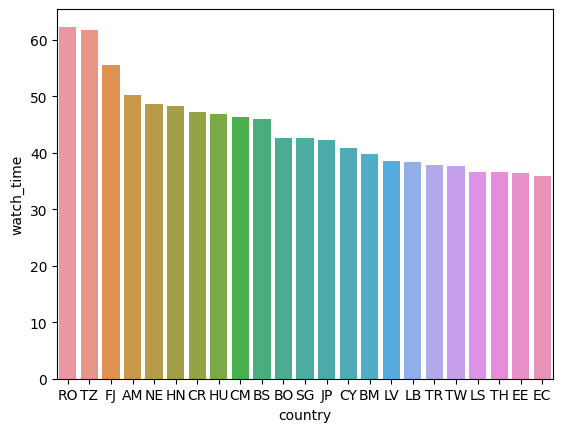

In [6]:
watch_time_per_country = pd.merge(student_learning,student_info,on='student_id',how='outer')
watch_time_per_country=watch_time_per_country.dropna()

watch_time_per_country_mean =[]
for cn in countries:
    mean_val = watch_time_per_country[watch_time_per_country['student_country'] == cn]['minutes_watched'].mean()
    watch_time_per_country_mean.append([cn,mean_val])

watch_time_per_country_mean_df = pd.DataFrame(watch_time_per_country_mean,columns=['country','watch_time'])

watch_time_per_country_mean_df= watch_time_per_country_mean_df.sort_values(by='watch_time',ascending=False)

sns.barplot(x=watch_time_per_country_mean_df[watch_time_per_country_mean_df['watch_time']>=35]['country'],y=watch_time_per_country_mean_df[watch_time_per_country_mean_df['watch_time']>=35]['watch_time'])

    Which courses are the most watched by students?

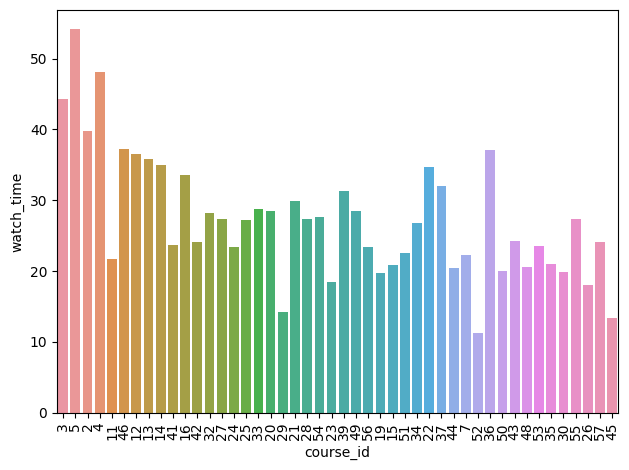

,course_id,watch_time,course_title
0,3,54.161691,The Complete Data Visualization Course with Py...
1,5,48.125733,Data Preprocessing with NumPy
2,2,44.332014,Introduction to Tableau
3,4,39.785369,Introduction to R Programming
4,11,37.206442,Data Cleaning and Preprocessing with pandas
5,46,37.077068,Data Literacy
6,12,36.589891,Introduction to Business Analytics
7,13,35.801318,Data Analysis with Excel Pivot Tables
8,14,35.038019,SQL
9,41,34.668908,Convolutional Neural Networks with TensorFlow ...


In [7]:
import matplotlib.pyplot as plt

most_watched = pd.merge(student_learning,course_info,on='course_id',how='outer').dropna()
course_ids=most_watched.course_id.unique()
most_watched_mean=[]

for id in course_ids:
    mean_watch_per_course = most_watched[most_watched['course_id'] == id]['minutes_watched'].mean()
    most_watched_mean.append([id,mean_watch_per_course])

most_watched_mean_df = pd.DataFrame(most_watched_mean,columns=['course_id','watch_time'])

most_watched_mean_df=most_watched_mean_df.sort_values(by='watch_time',ascending=False)
sns.barplot(x=most_watched_mean_df.course_id,y=most_watched_mean_df.watch_time)
plt.xticks(plt.xticks()[0], most_watched_mean_df.course_id, rotation=90)
plt.tight_layout()
plt.show()
most_watched_mean_df_course=pd.merge(most_watched_mean_df,course_info,on='course_id',how='outer')
most_watched_mean_df_course

    How are they rated?

In [1]:
import mysql.connector
from mysql.connector import Error

db = mysql.connector.connect(host='localhost',database='365_database',user='root',password='mynewpassword',auth_plugin='mysql_native_password')

mycursor = db.cursor()

x=mycursor.execute("SHOW tables")
for x in mycursor:
  print(x) 

('365_course_info',)
('365_course_ratings',)
('365_exam_info',)
('365_quiz_info',)
('365_student_engagement',)
('365_student_exams',)
('365_student_hub_questions',)
('365_student_info',)
('365_student_learning',)
('365_student_purchases',)
('365_student_quizzes',)


In [32]:
query = '''
SELECT 
    course_id , 
    AVG(course_rating) as avg_rating
FROM  
    365_course_ratings 

GROUP BY 
    course_id
'''
avg_rating=pd.read_sql(query,db)
rating_per_watch = pd.merge(most_watched_mean_df_course,avg_rating,on='course_id',how='outer')
rating_per_watch

/tmp/ipykernel_6680/3560335349.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_rating=pd.read_sql(query,db)


,course_id,watch_time,course_title,avg_rating
0,3,54.161691,The Complete Data Visualization Course with Py...,4.7059
1,5,48.125733,Data Preprocessing with NumPy,4.9032
2,2,44.332014,Introduction to Tableau,4.6250
3,4,39.785369,Introduction to R Programming,4.8800
4,11,37.206442,Data Cleaning and Preprocessing with pandas,4.6226
5,46,37.077068,Data Literacy,4.7917
6,12,36.589891,Introduction to Business Analytics,4.3571
7,13,35.801318,Data Analysis with Excel Pivot Tables,4.8444
8,14,35.038019,SQL,4.8160
9,41,34.668908,Convolutional Neural Networks with TensorFlow ...,4.7500
